<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORTING LIBRARIES
    </h3>
    </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORTING DATA
    </h3>
    </div>
   

In [2]:
data = pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        READING DATA
    </h3>
    </div>

In [3]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
print("The size of this data is " + str(data.size)+".")
print("There are "+str(data.shape[0])+" rows and "+str(data.shape[1])+" columns in this data.")

The size of this data is 140933.
There are 10841 rows and 13 columns in this data.


In [5]:
# Checking Null Values in Our Data
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# The names of all 13 columns are defined below
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# Describe method automatically performs operations on data and shows count,mean,standard deviation,min,max and etc.
print(data.describe())
print(data.describe)

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
<bound method NDFrame.describe of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR          

In [8]:
data['App'].nunique()

9660

In [9]:
data['Category'].nunique()

34

In [10]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        DATA CLEANING
    </h3>
    </div>

In [11]:
# Drop duplicates from data
apps = data.drop_duplicates(subset='App')

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
print(apps.head())

Total number of apps in the dataset =  9660
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018    

In [12]:
# Columns to clean 
cols = ['Installs','Price']

# Characters to remove
chars = ['+',",","$"]

# storing columns_to_clean in col variable
for col in cols:
    # storing characters_to_clean in char variable
    for char in chars:
        # Replacing unnecessary characters with empty string
        apps[col] = apps[col].apply(lambda c: c.replace(char, ''))

# Lets check a random sample of head of 5 rows
apps.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

In [13]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        EDA
    </h3>
    </div>

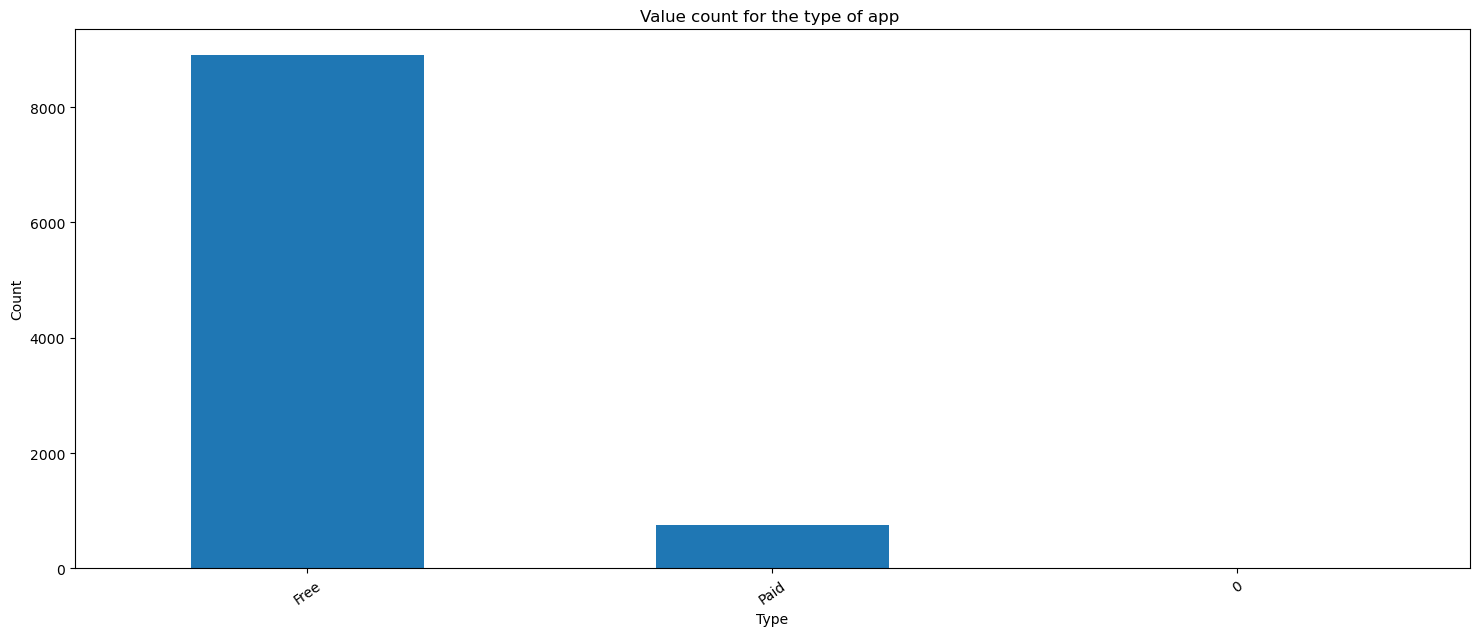

In [14]:
plt.figure(figsize=(18,7))
apps["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Value count for the type of app ")
plt.xticks(rotation=35)

plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
    Thanks For Reading My Notebook!
    </h3>
    </div>